In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv('placement.csv')

In [15]:
df.head()

cgpa  placement_exam_marks  placed
0  7.19                  26.0       1
1  7.46                  38.0       1
2  7.54                  40.0       1
3  6.42                   8.0       1
4  7.23                  17.0       0

In [17]:
X = df.drop(columns=['placed'])
y = df['placed']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: ylabel='Density'>

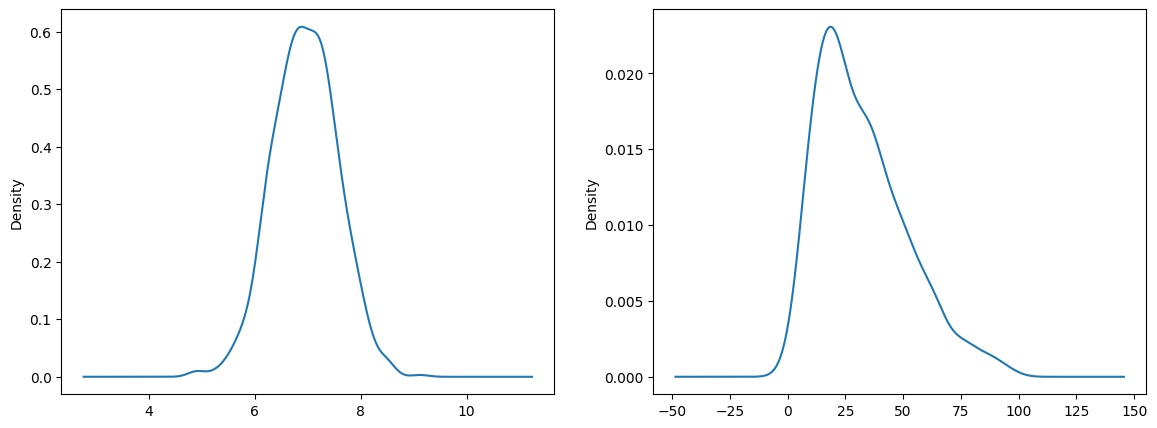

In [49]:
plt.figure(figsize=(14,5))
ax = plt.subplot(1,2,1)
X_train['cgpa'].plot(kind='kde', ax=ax)

ax1 = plt.subplot(1,2,2)
X_train['placement_exam_marks'].plot(kind='kde', ax=ax1)

# Z Score onmly on cgpa as normal distribution


In [66]:
mu = df['cgpa'].mean()
dev = df['cgpa'].std()
print(f"{mu} is mean, {dev} is standard deviation, {df['cgpa'].max()} is max")
out1 = mu - 3*dev
out2 = mu + 3*dev
print(f"[{out1}, {out2}] is the range of the values, outside this range are outliers")

6.96124 is mean, 0.6158978751323896 is standard deviation, 9.12 is max
[5.113546374602832, 8.808933625397168] is the range of the values, outside this range are outliers


In [72]:
df[(df['cgpa'] > out2) | (df['cgpa'] < out1)]

cgpa  placement_exam_marks  placed
485  4.92                  44.0       1
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
999  4.90                  10.0       1

## Trimming

In [77]:
new_df = df[(df['cgpa'] > out1) | (df['cgpa'] < out2)]
new_df

cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1

[1000 rows x 3 columns]

## Capping

In [80]:
new_df = df

In [130]:
new_df['cgpa'] = np.where(new_df['cgpa'] < out1, out1, new_df['cgpa'])

In [134]:
new_df['cgpa'] = np.where(new_df['cgpa'] > out2, out2, new_df['cgpa'])

<Axes: ylabel='Density'>

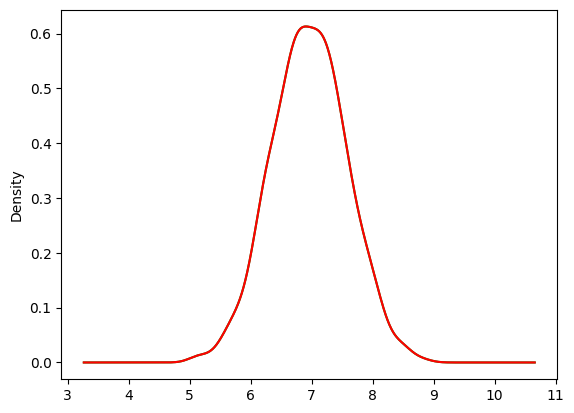

In [146]:
ax = plt.subplot(111)
new_df['cgpa'].plot(kind='kde', ax=ax, color='green')
df['cgpa'].plot(kind='kde', ax=ax, color='red')

In [150]:
new_df.shape

(1000, 3)